# Breast Cancer Data Analysis and Predictions

## - Applied Machine Learning

**GDAA 2010 Data Mining Modeling Assignment 1 | Cindy Lu | March 30, 2022**

The purpose of this assignment is to apply traditional machine learning techniques on various variables of a breast mass and predict whether it is malignant or benign. The Breast Cancer Wiscsonsin (Diagnostic) Data Set is well-established and widely used by researchers and data science students, in addition to building the prediction model, the focus for this assignment will be on exploring the effects of model input and the corresponding performances of various scikit-learn models.

### Required Python Packages

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

### Data Preparation

The dataset is included in the scikit-learn's dataset library, and will be loaded directly. Information on the dataset and statistics summary is displayed below.

In [2]:
# load the dataset
cancer = datasets.load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Examine the dataset**

Convert the dataset into a dataframe for easier interpretation. The first 5 records and their corresponding variables are shown below.

In [3]:
# Enhance data readibility by converting to dataframe
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
pd.set_option('display.max_columns', None)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  diagnosis  
0                  0.11890        0.0  
1                  0.08902        0.0  
2                  0.08758        0.0  
3                  0.17300        0.0  
4                  0.07678        0.0

In [4]:
print("There are", df.shape[0], "records with", df.shape[1], "variables.")

There are 569 records with 31 variables.


In [5]:
# Check for null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

The dataset is complete without null values.

### Exploratory Data Analysis

The `Diagnosis` field will be the target variable. An overview of variable relationships are examined in the following steps.

<Axes: xlabel='diagnosis', ylabel='count'>

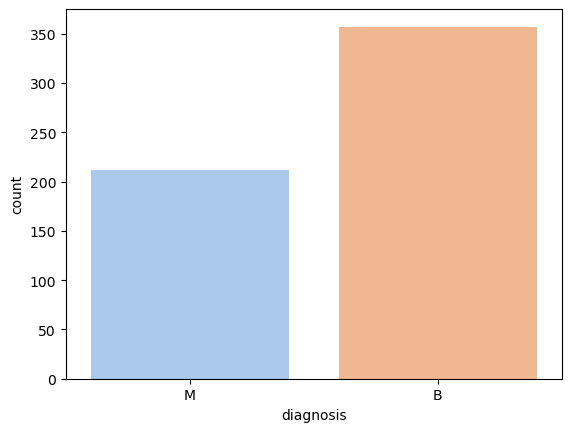

In [6]:
# Plot the distribution of the target variable
df_MB = df.copy()
df_MB.head()
df_MB['diagnosis'] = df_MB['diagnosis'].map({0:'M', 1:'B'})
sns.countplot(x='diagnosis', data=df_MB, palette='pastel')

There are more Benign diagnoses than Maglignant diagnoses. I'm interested to explore if an imbalanced target distribution would have an effect on data modeling performance. A separate dataset with equal number of Benign and Maglignant diagnosis is created and will be used in the later steps.

<Axes: xlabel='diagnosis', ylabel='count'>

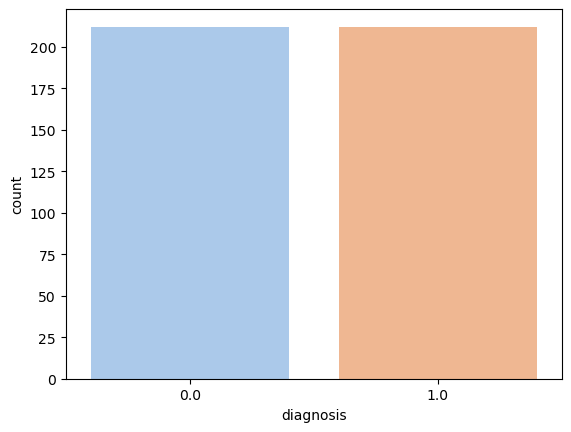

In [7]:
# Create a dataset with equal distribution

balanced_df = df.groupby('diagnosis').apply(lambda x: x.sample(n=212))
balanced_df = balanced_df.reset_index(drop=True)

# Visualize the distribution
sns.countplot(x='diagnosis', data=balanced_df, palette='pastel')

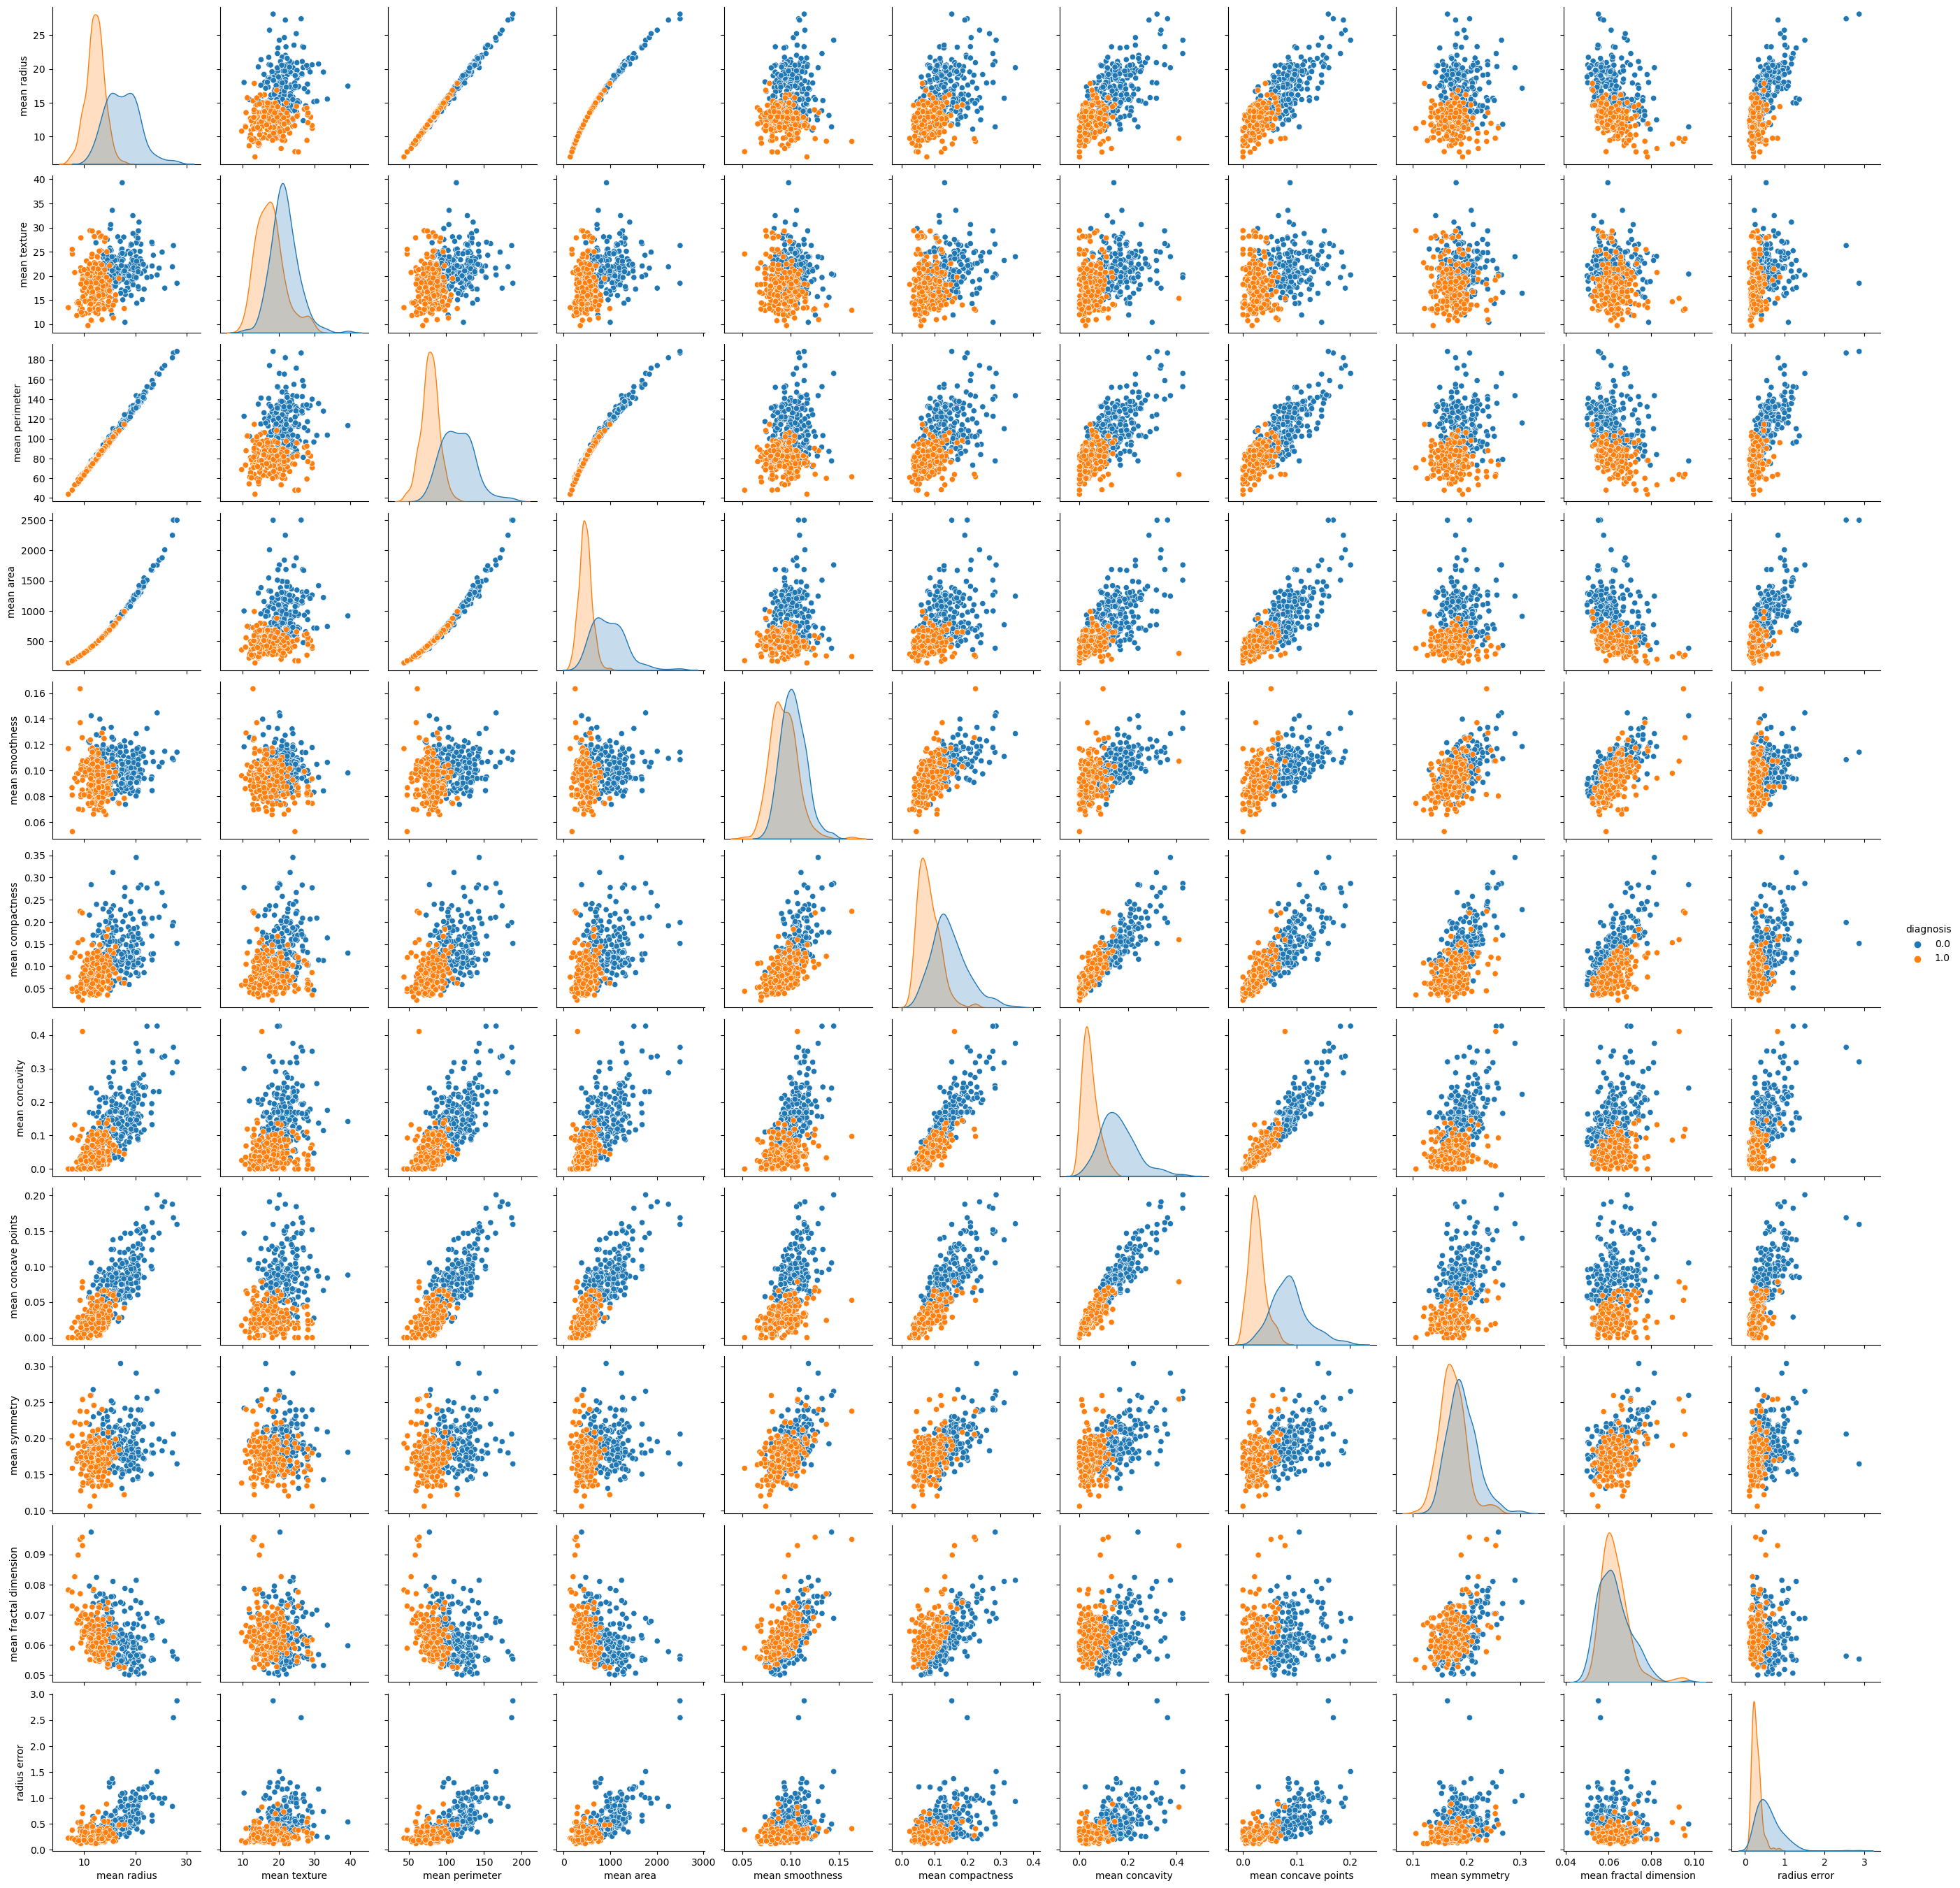

In [8]:
# Examine a subset of variables that represent mean values
f_mean= balanced_df.iloc[:,[i for i in range(0,11)] + [30]]
sns.pairplot(f_mean, hue='diagnosis')

It is quite easy to observe the distinction between malignant and benign breast masses in most of the scatterplots above. For example the positive relationship between mean area and mean radius (which are mathematically related directly). This also indicates some potential strong correlations between variables, which we can further investigate based on the correlation index.

<Axes: >

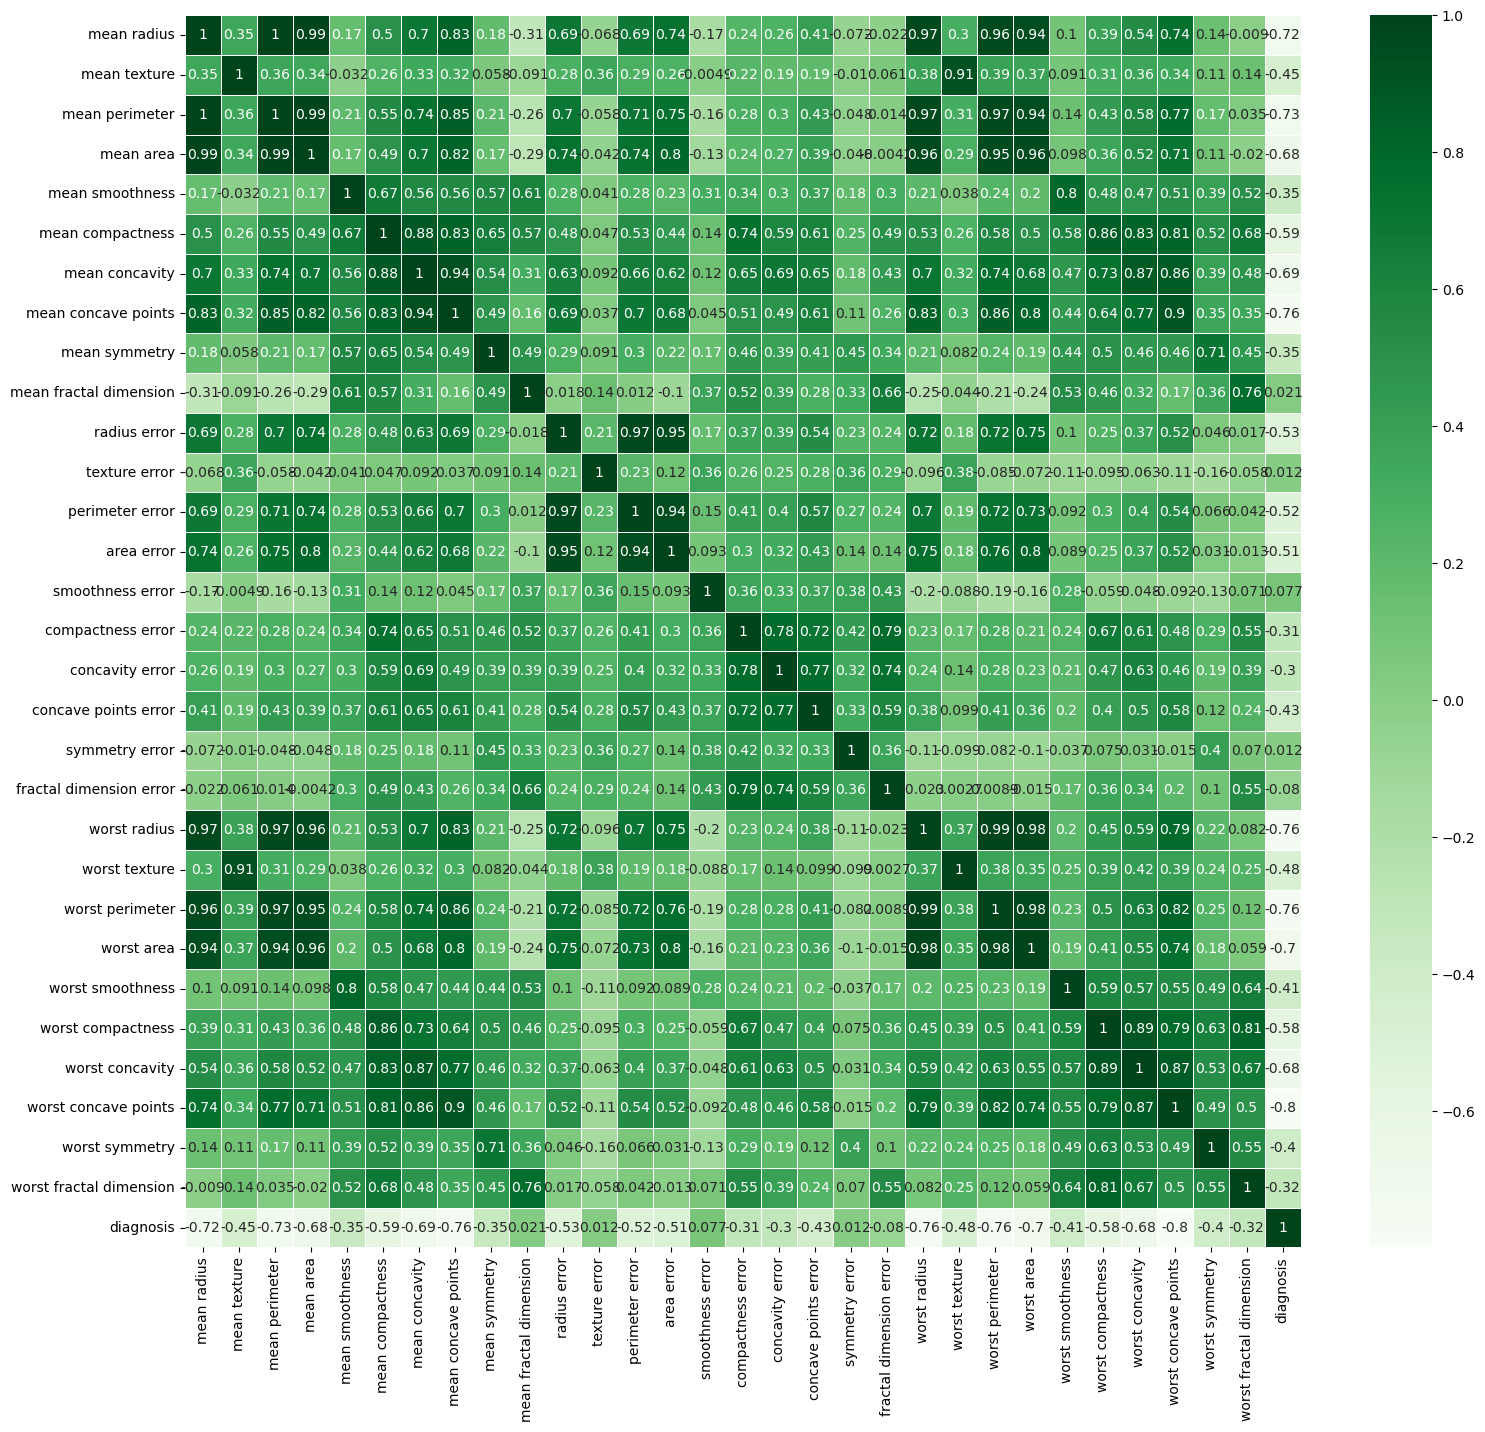

In [9]:
# Plot the correlations matrix
plt.figure(figsize=(18,16))
sns.heatmap(balanced_df.corr(),annot=True,linewidth=.5,cmap='Greens')

Some variables are strongly correlated, which may add computation burden rather than enhance the model performance. A third dataset with variable correlation over 0.9 removed is created and will be used in the data modeling step. 

In [10]:
# Obtain correlation
corr_matrix = balanced_df.corr().abs()

# Select upper threshold of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90 and drop them in the df_var dataset
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
df_var = balanced_df.drop(to_drop, axis=1)

# Show remaining variabls
df_var.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension', 'diagnosis'],
      dtype='object')

### Data Modeling

Several input scenarios will be evaluated, including:
* Original `df` dataset
* `df_balanced` dataset with balanced number of target variable
* `df_var` dataset that with equal number of target variable and without highly correlated variables

In [11]:
# Determine input variables (X) and target variable (y)
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_bal = balanced_df.drop('diagnosis', axis = 1)
y_bal = balanced_df['diagnosis']

X_var = df_var.drop('diagnosis', axis = 1)
y_var = df_var['diagnosis']

**Create a Pipeline to run different classifier models**

In [12]:
# The Pipeline includes scaling the data first and then apply classifiers
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])
clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC(kernel='linear'))
clfs.append(SVC(kernel='rbf'))
clfs.append(KNeighborsClassifier(n_neighbors=2))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

**Run the models with Cross-Validated Data**

* Original `df`: with all 30 input features and imbalance target feature

In [13]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X, y, cv=6)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
        if key == 'fit_time':
            print("Total time for fitting the estimator: %0.4f" % values.sum())
        if key == 'test_score':
            print("%0.4f accuracy with a standard deviation of %0.4f" % (values.mean(), values.std()))

---------------------------------
LogisticRegression()
-----------------------------------
Total time for fitting the estimator: 0.0480
0.9807 accuracy with a standard deviation of 0.0072
---------------------------------
SVC(kernel='linear')
-----------------------------------
Total time for fitting the estimator: 0.0220
0.9789 accuracy with a standard deviation of 0.0001
---------------------------------
SVC()
-----------------------------------
Total time for fitting the estimator: 0.0219
0.9719 accuracy with a standard deviation of 0.0131
---------------------------------
KNeighborsClassifier(n_neighbors=2)
-----------------------------------
Total time for fitting the estimator: 0.0103
0.9419 accuracy with a standard deviation of 0.0292
---------------------------------
DecisionTreeClassifier()
-----------------------------------
Total time for fitting the estimator: 0.0463
0.9314 accuracy with a standard deviation of 0.0242
---------------------------------
RandomForestClassifier

* Balanced `df`: with equal target variable distribution and complete 30 input features

In [14]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_bal, y_bal, cv=6)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
        if key == 'fit_time':
            print("Total time for fitting the estimator: %0.4f" % values.sum())
        if key == 'test_score':
            print("%0.4f accuracy with a standard deviation of %0.4f" % (values.mean(), values.std()))

---------------------------------
LogisticRegression()
-----------------------------------
Total time for fitting the estimator: 0.0424
0.9717 accuracy with a standard deviation of 0.0141
---------------------------------
SVC(kernel='linear')
-----------------------------------
Total time for fitting the estimator: 0.0184
0.9694 accuracy with a standard deviation of 0.0189
---------------------------------
SVC()
-----------------------------------
Total time for fitting the estimator: 0.0188
0.9647 accuracy with a standard deviation of 0.0195
---------------------------------
KNeighborsClassifier(n_neighbors=2)
-----------------------------------
Total time for fitting the estimator: 0.0135
0.9222 accuracy with a standard deviation of 0.0300
---------------------------------
DecisionTreeClassifier()
-----------------------------------
Total time for fitting the estimator: 0.0281
0.9270 accuracy with a standard deviation of 0.0249
---------------------------------
RandomForestClassifier

* Varied `df`: with equal target variable distribution and input variables with <0.9 correlation

In [15]:
for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_var, y_var, cv=6)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
        if key == 'fit_time':
            print("Total time for fitting the estimator: %0.4f" % values.sum())
        if key == 'test_score':
            print("%0.4f accuracy with a standard deviation of %0.4f" % (values.mean(), values.std()))

---------------------------------
LogisticRegression()
-----------------------------------
Total time for fitting the estimator: 0.0370
0.9552 accuracy with a standard deviation of 0.0151
---------------------------------
SVC(kernel='linear')
-----------------------------------
Total time for fitting the estimator: 0.0178
0.9647 accuracy with a standard deviation of 0.0157
---------------------------------
SVC()
-----------------------------------
Total time for fitting the estimator: 0.0170
0.9505 accuracy with a standard deviation of 0.0177
---------------------------------
KNeighborsClassifier(n_neighbors=2)
-----------------------------------
Total time for fitting the estimator: 0.0119
0.8963 accuracy with a standard deviation of 0.0191
---------------------------------
DecisionTreeClassifier()
-----------------------------------
Total time for fitting the estimator: 0.0241
0.9008 accuracy with a standard deviation of 0.0428
---------------------------------
RandomForestClassifier

Based on the cross validation results, maintaining all input features and all records yielded the best overall performance. Logistics Regression and SVM are both top performers, while SVM tends to be more efficient with less time required to fit the model. The following section will evaluate model performance of the top 3 models using the original test dataset (i.e. before balancing number of target variable and removing highly correlated variables)

**Validataion with Test Data**

In [16]:
# Create training & testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Logistic Regression

In [17]:
# LR
lr = Pipeline([
  ('scaler', StandardScaler()),
  ('classification', LogisticRegression())
])
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9824561403508771

* Support Vecgor Machine

In [18]:
# SVM
svm = Pipeline([
  ('scaler', StandardScaler()),
  ('classification', SVC())
])
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9766081871345029

* Gradient Boosting Classifier

In [19]:
gb = Pipeline([
  ('scaler', StandardScaler()),
  ('classification', GradientBoostingClassifier())
])
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9590643274853801

**Confusion Matrice**

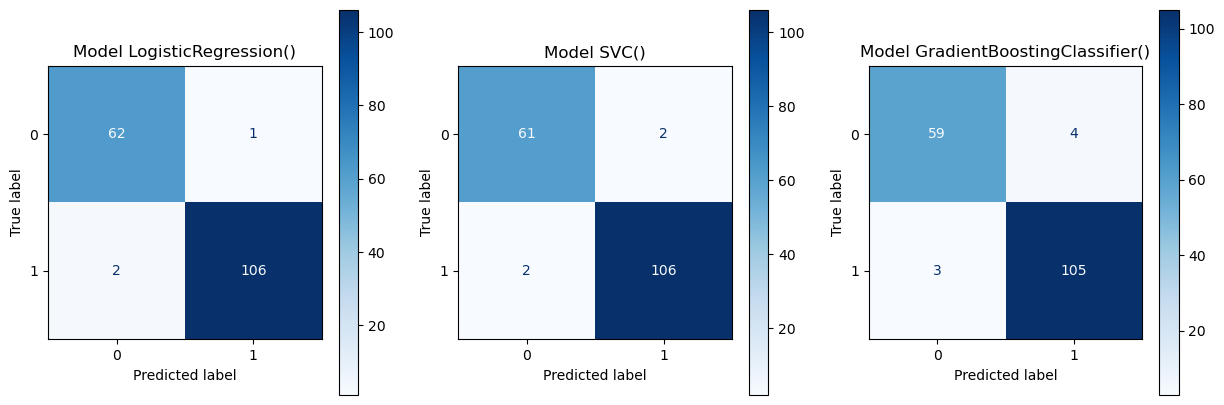

In [20]:
# Compare Confusion Matrices

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

# Loop through the models and plot the confusion matrix for each one
for i, model in enumerate([lr, svm, gb]):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues)
    axes[i].set_title('Model ' + str(model['classification']))

# Display the subplots
plt.show()

The result is similar to the cross validation method, with Logistic Regression outperformed SVM and GradientBoosting. As shown in the confusion matrice above. 1 malignant record was misclassified as benign in Logistic Regression model, while the number is 2 in SVM and 4 in Gradient Boosting. While neiter outcome would be ideal, it may be more critical to correctly predict malignant breast mass in order to proceed with timely treatment.

**RoC and Precision-Recall Curves**

Another way to evaluate a model's performance is through the probabilistic forecast of predicted classification. bBth RoC Curve and Precision-Recall Curve can be used as the diagnostic tool.
* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
* Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

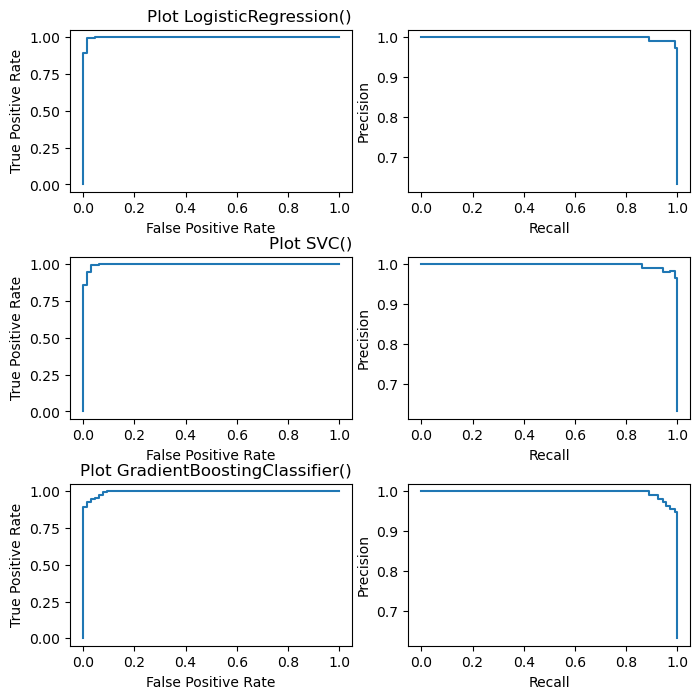

In [21]:
fig, axes = plt.subplots(3,2, figsize=(8, 8))

# Loop through the models and plot the RoC and Precision
for i, model in enumerate([lr, svm, gb]):
    y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
    prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
    roc_display.plot(ax=axes[i,0])
    pr_display.plot(ax=axes[i,1])
    axes[i,0].set_title("Plot " + str(model['classification']),loc='Right')
                        
plt.subplots_adjust(hspace=0.4)
plt.show()

All 3 models displayed a skilled model trend (i.e. high probablity and ratio of both true positive and true negative). 

### Summary

There are many factors to consider when designing a classification model, including the nature of the dataset, parameters, and performance. More complex algorithm may not always yield better results. As demonstrated in this assignment, LogisticRegression outperformed other algorithms including ensemble models such as Random Forest. 
With the current dataset, retaining all input variables lead to overall better performance across all models. Note that the compute time is relatively fast with this simple dataset, but feature selection may be more important when dealing with complex datasets. 

## Reference

* https://scikit-learn.org/stable/index.html
* https://www.kaggle.com/code/gautham11/building-a-scikit-learn-classification-pipeline